In [8]:
import random
import timeit
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.setrecursionlimit(100000)

def insertion_sort(arr):
  """
  Insertion Sort
  """
  for i in range(1, len(arr)):
    current = arr[i]
    j = i-1
    while j>=0 and arr[j] >current:
      arr[j+1] = arr[j]
      j -=1
    arr[j+1] = current
  return arr

def quicksort(arr):
  """
  Quick Sort
  """
  if len(arr) <= 1:
      return arr
  pivot = arr[len(arr) // 2]
  # pivot = arr[len(arr)-1]
  left = [x for x in arr if x < pivot]
  middle = [x for x in arr if x == pivot]
  right = [x for x in arr if x > pivot]
  return quicksort(left) + middle + quicksort(right)

def quicksort2(array, partition_limit=100):
  """
  Insertion sort is the limit is higher than array length, else quick sort
  """
  sorted_array=[]
  if len(array) <= partition_limit:
    sorted_array = insertion_sort(array)
  else:
    sorted_array = quicksort(array)
  return sorted_array





Check sorting of basic array [-2, -4, 5, 6, 100, -50]
Insertion Sort : [-50, -4, -2, 5, 6, 100]
Quick Sort : [-50, -4, -2, 5, 6, 100]
Quick Sort 2 : [-50, -4, -2, 5, 6, 100]


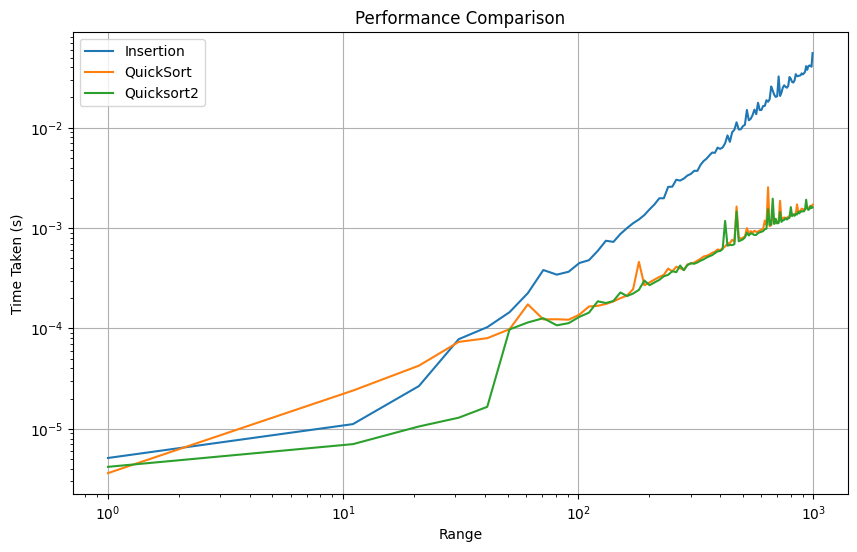

In [7]:
if __name__ == '__main__':
  """
  Check basic list sorting
  """
  basic_array = [-2,-4,5,6,100,-50]

  print(f'Check sorting of basic array {basic_array}')
  print(f'Insertion Sort : {insertion_sort(basic_array)}')
  print(f'Quick Sort : {quicksort(basic_array)}')
  print(f'Quick Sort 2 : {quicksort2(basic_array,10)}')

  # Generate a random list of integers
  cols = ['Range', 'Insertion', 'QuickSort','Quicksort2']
  lst = []

  """
  Run all the 3 methods for a sample of 1000 random number with 10 increments
  """
  for i in range(1,1000,10):
      random_list = [random.randint(1, i) for _ in range(i)]

      is_time_taken = timeit.timeit(lambda: insertion_sort(random_list), number=1)
      qs_time_taken = timeit.timeit(lambda: quicksort(random_list), number=1)
      qs2_time_taken = timeit.timeit(lambda: quicksort2(random_list,50), number=1)


      lst.append([i,is_time_taken,qs_time_taken,qs2_time_taken])


  df = pd.DataFrame(lst, columns = cols)
  # print(df)

  x = df['Range']
  y_cols= ['Insertion', 'QuickSort', 'Quicksort2']
  y = df[y_cols]

  # Plot the time in matplotlib
  plt.figure(figsize=(10, 6))

  for col in y_cols:
      plt.plot(x, y[col],  label=col)

  plt.title('Performance Comparison')
  plt.xlabel('Range')
  plt.ylabel('Time Taken (s)')
  plt.xscale('log')  # Log scale for x-axis
  plt.yscale('log')  # Log scale for y-axis
  plt.grid(True)
  plt.legend()
  plt.show()

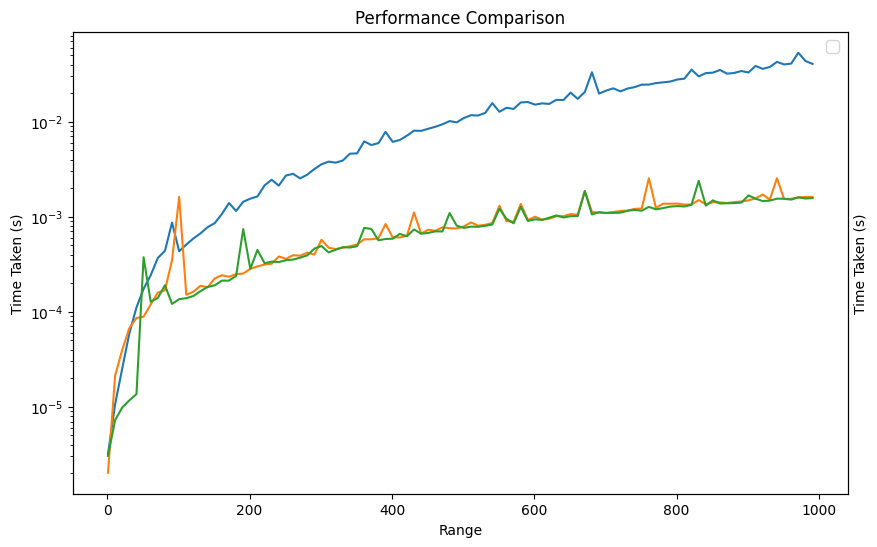

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 6))
for col in y_cols:
    ax1.plot(x, y[col],  label=col)

ax1.set_title('Performance Comparison')
ax1.set_xlabel('Range')
ax1.set_ylabel('Time Taken (s)')

# Set y-axis to log scale
ax1.set_yscale('log')

# Create a second y-axis in absolute scale
ax2 = ax1.twinx()
ax2.set_ylabel('Time Taken (s)')

# Hide the y-axis for the second plot
ax2.set_yticks([])

plt.grid(True)
plt.legend(fontsize="large")
plt.show()